# Exercise 1

## Пункт А

Напишите программу, вычисляющую интерполяционный полином Лангранжа в заданных точках.

Вычислите интерполяционный полином для функции
$$f_s(x) = x \sin (2x)$$
на интервале $[x_0 - 5, x_0 + 5]$ с равномерно распределенными узлами.

Постройте график погрешности, найдите её максимальное значение для $x_0 = 100, N = 5, 10, 15$.
Объясните полученные результаты.

In [191]:
from itertools import combinations
import math
import matplotlib.pyplot as plt
import numpy as np
import statistics

Базисные полиномы будем искать по формуле:

$$l_{i}(x)={\frac {x-x_{0}}{x_{i}-x_{0}}}\cdots {\frac {x-x_{i-1}}{x_{i}-x_{i-1}}}\cdot {\frac {x-x_{i+1}}{x_{i}-x_{i+1}}}\cdots {\frac {x-x_{n}}{x_{i}-x_{n}}}$$

In [32]:
def basic_polynomial(x, i, x_0):
    indexes = [i for i in range(len(x))]
    indexes.remove(i)
    
    result = 1
    for j in indexes:
        result *= (x_0 - x[j]) / (x[i] - x[j])
    
    return result

In [50]:
def lagrange_polynomial(x, y, new_x):
    result = 0
    
    for i in range(len(x)):
        result += y[i] * basic_polynomial(x, i, new_x)
        
    return result

In [44]:
def generate_points(x_0, a, b, number_of_points):
    return np.linspace(x_0 - a, x_0 + b, number_of_points)

In [230]:
def plot_estimated_and_error(x_for_calculation, y_acc_for_calculation, x, y_acc, y_est, error):
    plt.figure(figsize=(15,15))
    
    plt.subplot(4, 1, 1)
    plt.plot(x_for_calculation, y_acc_for_calculation, 'ko-')
    plt.ylabel('dot sets')
    plt.grid()

    plt.subplot(4, 1, 2)
    plt.plot(x, y_acc, 'g-')
    plt.ylabel('accurate')
    plt.grid()
    
    plt.subplot(4, 1, 3)
    plt.plot(x, y_est, '.-')
    plt.ylabel('estimated')
    plt.grid()
    
    plt.subplot(4, 1, 4)
    plt.plot(x, error, 'r.-')
    plt.ylabel('error')
    plt.grid()
    
    plt.show()

In [262]:
def f_s(x):
    return x * math.sin(2 * x)

In [268]:
def est_and_plot_uniform(x_0, a, b, N, alpha, f):
    x_for_calculation = generate_points(x_0, a, b, N)
    y_acc_for_calculation = [f(k) for k in x_for_calculation]

    x = generate_points(x_0, a, b, alpha * N)
    y_acc = [f(k) for k in x]
    y_est = [lagrange_polynomial(x_for_calculation, y_acc_for_calculation, x[i]) 
             for i in range(len(x))]
    error = [y_acc[i] - y_est[i] for i in range(len(x))]
    
    
    plot_estimated_and_error(x_for_calculation, y_acc_for_calculation, x, y_acc, y_est, error)

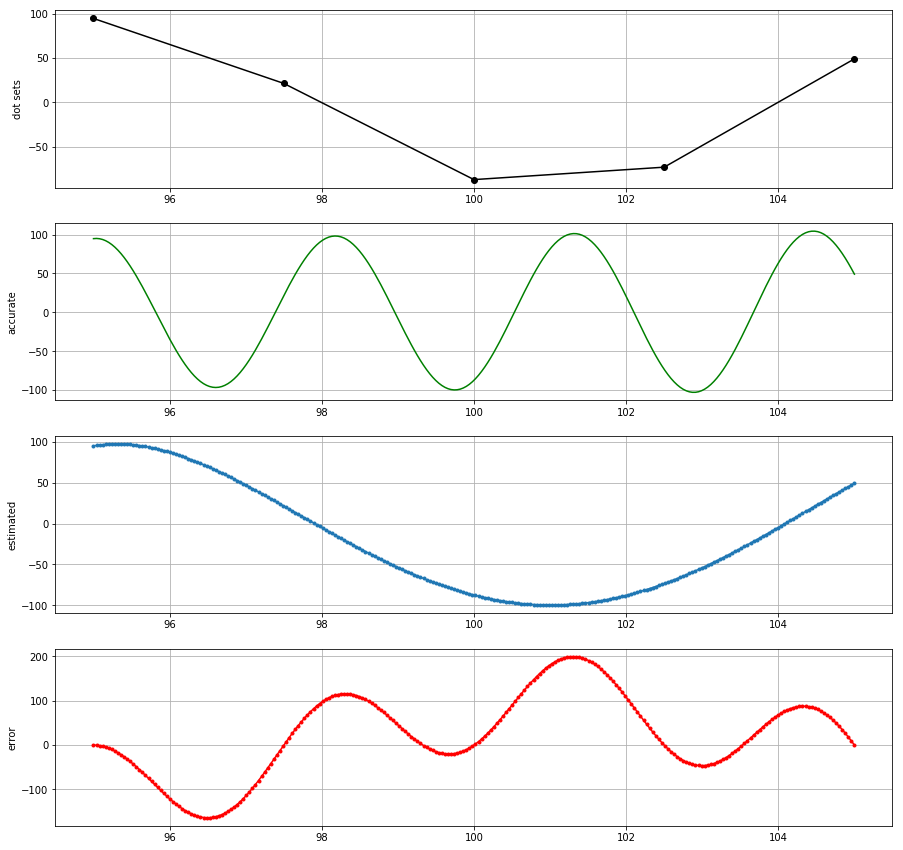

In [269]:
est_and_plot_uniform(100, 5, 5, 5, 50, f_s)

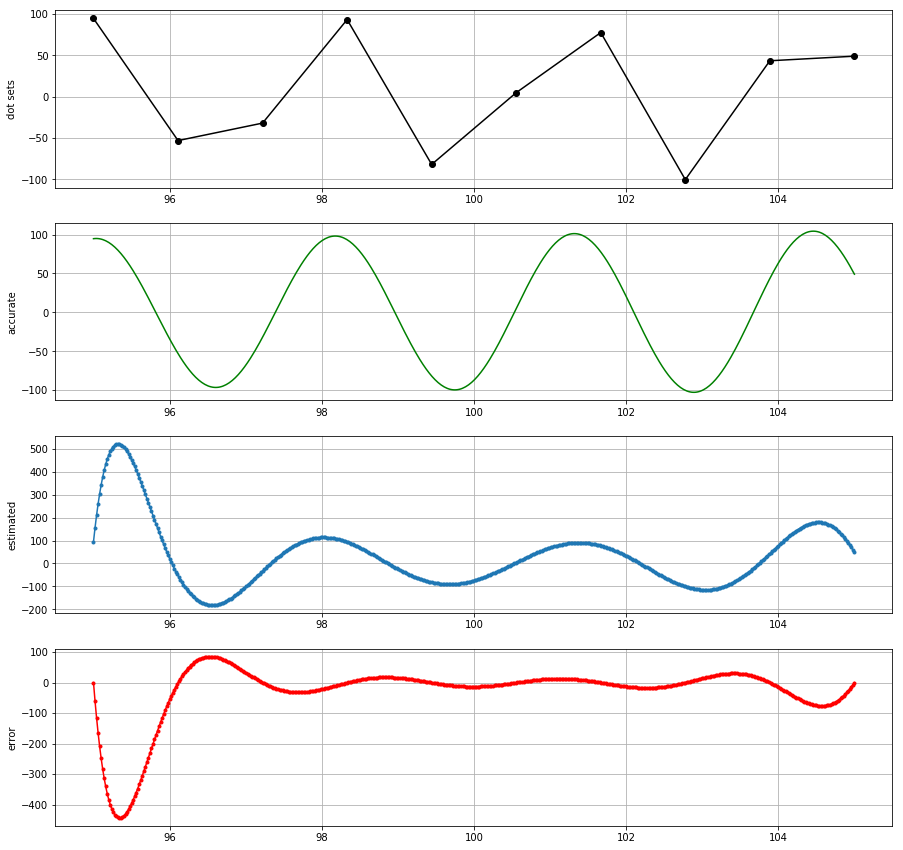

In [270]:
est_and_plot_uniform(100, 5, 5, 10, 50, f_s)

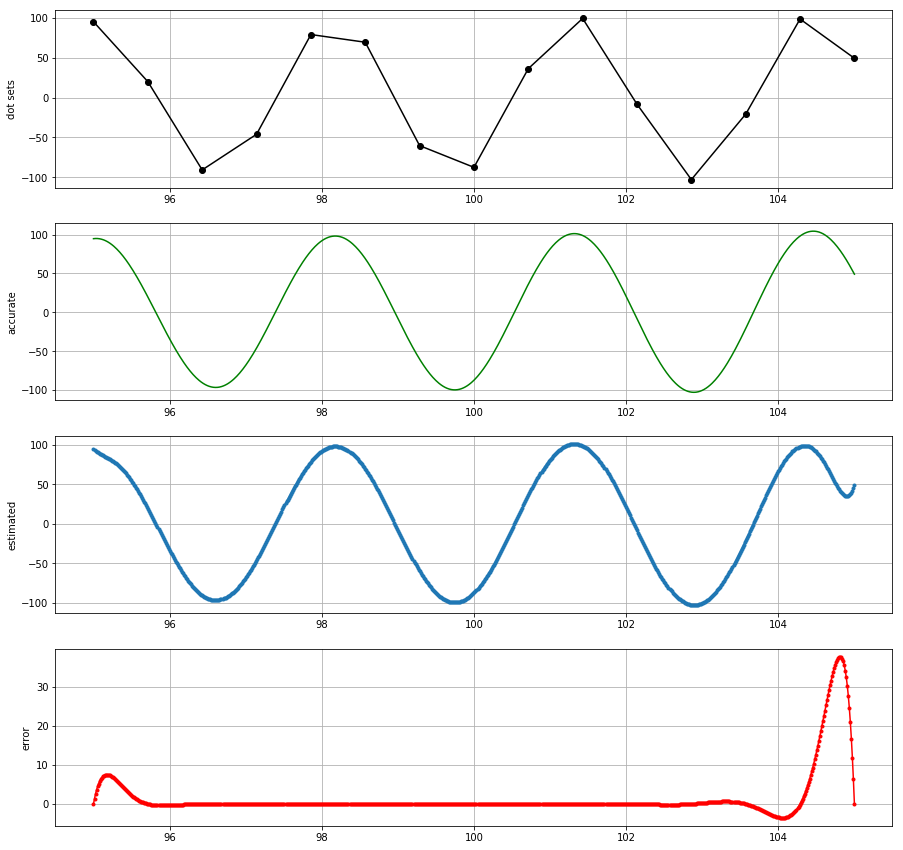

In [271]:
est_and_plot_uniform(100, 5, 5, 15, 50, f_s)

### Вывод по первому пункту:

## Пункт B

С помощью написанной программы, исследуйте погрешности интерполяции функции $f_S(x)$ на интервале $[x_0 - 5, x_0 + 5],\ x_0 = 100$.

Постройте зависимость максимальной погрешности от $N$ в диапазоне $N = 5 - 50$.

Обратите внимание на распределение локальной погрешности по интервалу интерполирования.

In [226]:
def plot_error_on_N_dependence(N, error_max, error_median, error_mean):
    plt.figure(figsize=(15,15))
    
    plt.subplot(3, 1, 1)
    plt.plot(N, error_max, 'ko-')
    plt.ylabel('maxes')
    plt.grid()

    plt.subplot(3, 1, 2)
    plt.plot(N, error_median, 'g-')
    plt.ylabel('medians')
    plt.grid()
    

    plt.subplot(3, 1, 3)
    plt.plot(N, error_mean, 'r.-')
    plt.ylabel('means')
    plt.grid()
    
    plt.show()

In [272]:
def dependence_est_error_on_N(x_0, a, b, N_min, N_max, alpha, f):
    error_max = []
    error_mean = []
    error_median = []
    
    all_n = np.arange(N_min, N_max + 1, 1)
    for N in all_n:
        x_for_calculation = generate_points(x_0, a, b, N)
        y_acc_for_calculation = [f(k) for k in x_for_calculation]

        x = generate_points(x_0, a, b, alpha * N)
        y_acc = [f(k) for k in x]
        y_est = [lagrange_polynomial(x_for_calculation, y_acc_for_calculation, x[i]) 
                 for i in range(len(x))]
        error_local = [y_acc[i] - y_est[i] for i in range(len(x))]
        error_max.append(max(error_local))
        error_mean.append(statistics.mean(error_local))
        error_median.append(statistics.median(error_local))
        
    
    
    plot_error_on_N_dependence(all_n, error_max, error_median, error_mean)

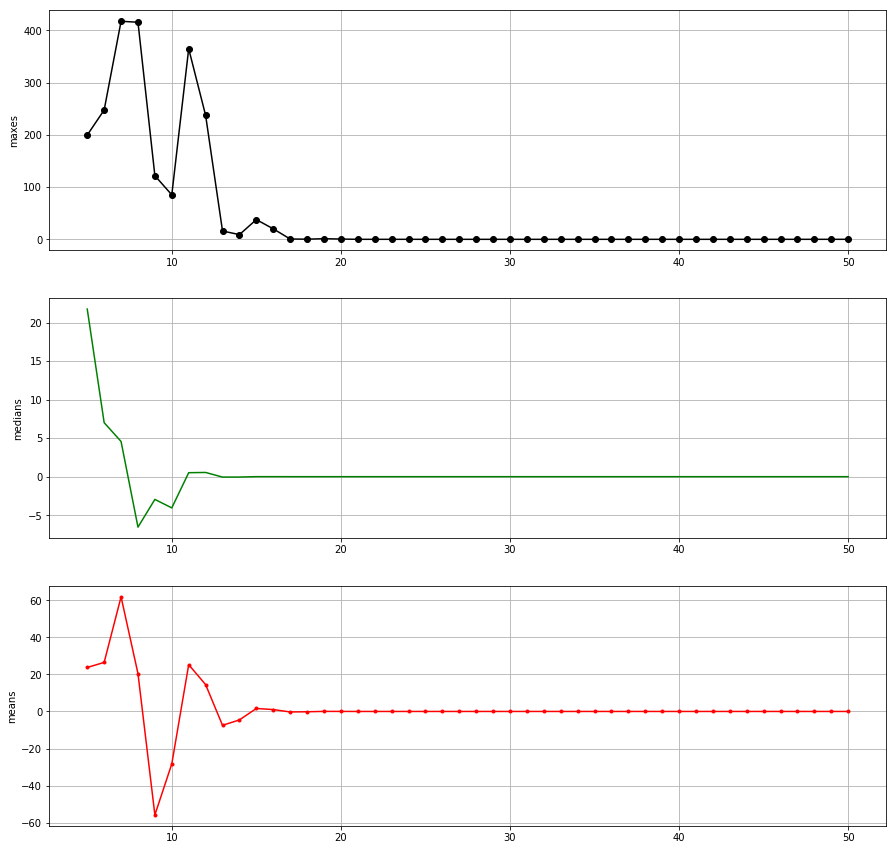

In [273]:
dependence_est_error_on_N(100, 5, 5, 5, 50, 50, f_s)

## Пункт C

Повторите пункт B для Чебышевских узлов
$$x_k = \cos (\frac{\pi}{2} \frac{2k - 1}{N})$$
на интервале $[-1, 1],\ k = 1, 2, ..., N$,
линейно отображенных на интервал интерполяции.

Сравните значения и распределения погрешностей для двух наборов узлов.

---------------------
Чтобы отразить один отрезок в другой, нужно построить биективную функцию.

**Биективная функция из $[a,b]$ в $[c,d]$**:

$$(d - c) \frac{x - a}{b - a} + c$$

In [249]:
 def bijective_function(x, c, d):
        a = min(x)
        b = max(x)
        x = [(d - c) * (x_i - a) / (b - a) + c for x_i in x]
        return x

In [250]:
def generate_points_by_Chebyshev(x_0, a, b, number_of_points):
    Cheb_x = [math.cos((math.pi / 2) * ((2 * k - 1) / number_of_points)) for k in range(1, number_of_points + 1)]
    return bijective_function(Cheb_x, x_0 - a, x_0 + b)    

In [274]:
def dependence_est_error_on_N_Chebyshev(x_0, a, b, N_min, N_max, alpha, f):
    error_max = []
    error_mean = []
    error_median = []
    
    all_n = np.arange(N_min, N_max + 1, 1)
    for N in all_n:
        x_for_calculation = generate_points_by_Chebyshev(x_0, a, b, N)
        y_acc_for_calculation = [f(k) for k in x_for_calculation]

        x = generate_points_by_Chebyshev(x_0, a, b, alpha * N)
        y_acc = [f(k) for k in x]
        y_est = [lagrange_polynomial(x_for_calculation, y_acc_for_calculation, x[i]) 
                 for i in range(len(x))]
        error_local = [y_acc[i] - y_est[i] for i in range(len(x))]
        
        error_max.append(max(error_local))
        error_mean.append(statistics.mean(error_local))
        error_median.append(statistics.median(error_local))
    
    
    plot_error_on_N_dependence(all_n, error_max, error_median, error_mean)

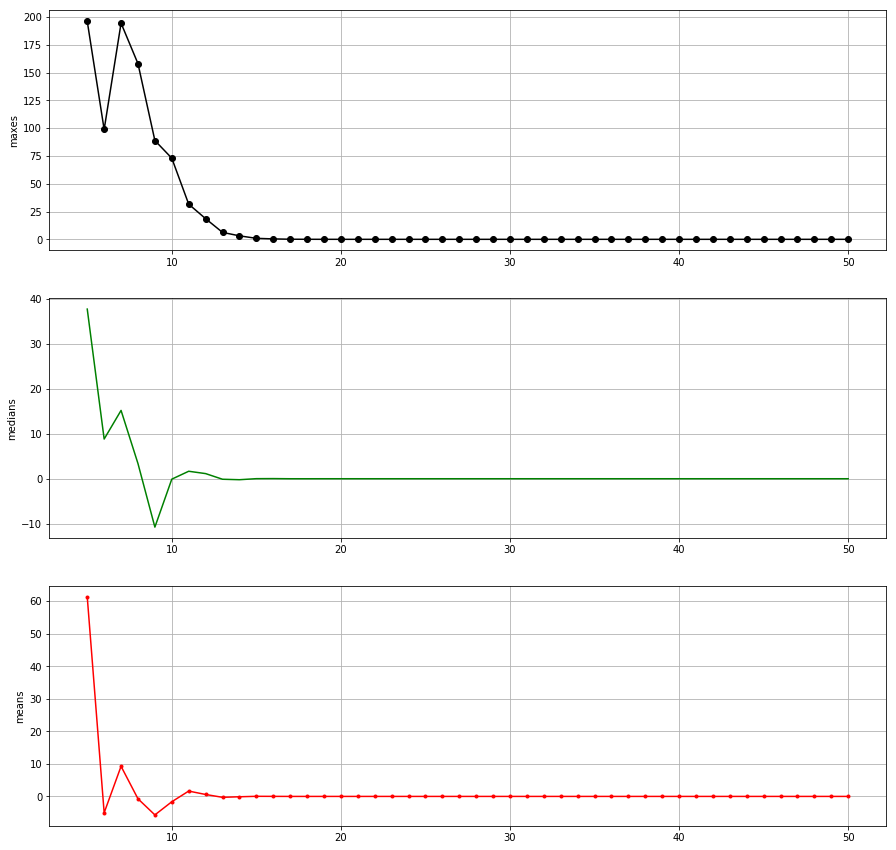

In [275]:
dependence_est_error_on_N_Chebyshev(100, 5, 5, 5, 50, 50, f_s)

## Пункт D

Повторите пункты B и C для функции $$f_M = |x - 1|$$ на интервале $[0, 2]$. 

Оцените скорость убывания максимальной ошибки как функции $N$, сравните с $f_S(x)$.

In [276]:
def f_m(x):
    return abs(x - 1)

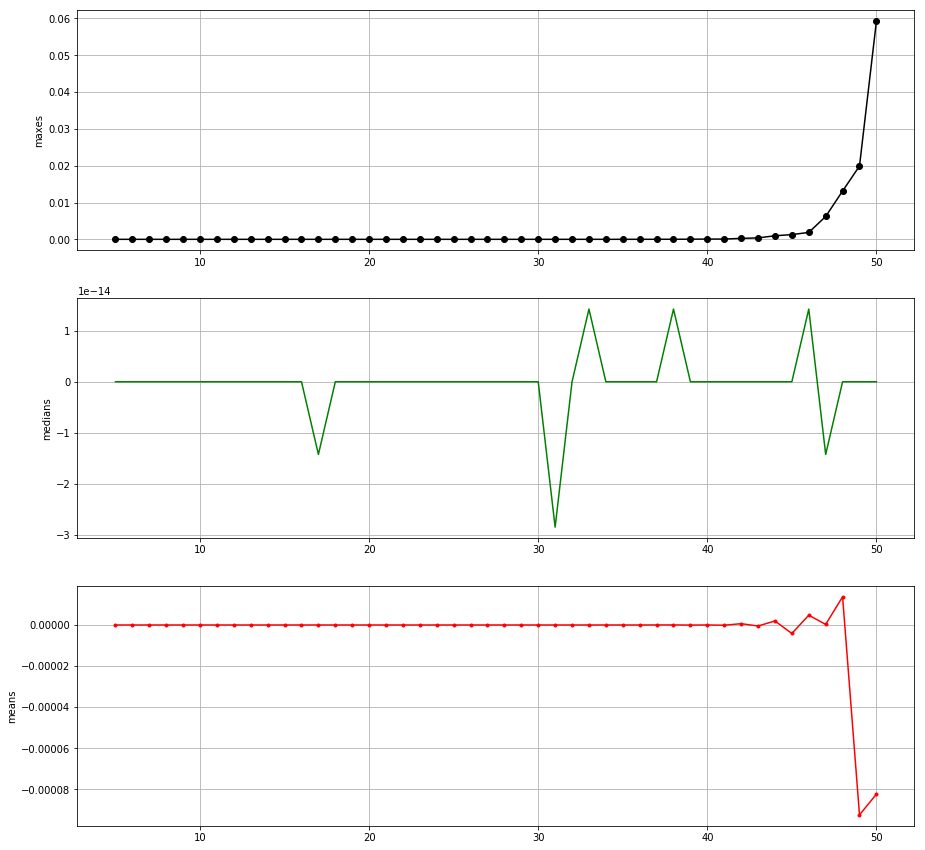

In [278]:
dependence_est_error_on_N(100, 5, 5, 5, 50, 50, f_m)

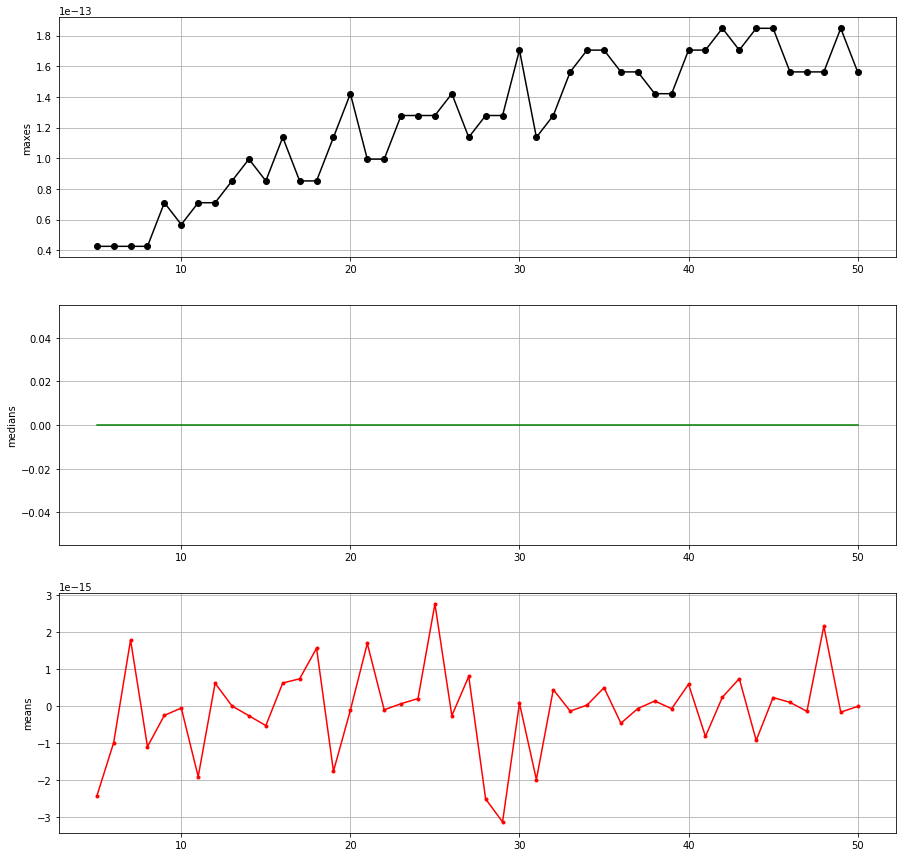

In [279]:
dependence_est_error_on_N_Chebyshev(100, 5, 5, 5, 50, 50, f_m)